<a href="https://colab.research.google.com/github/SANGJI-PARK/Codestates_Project/blob/main/%5BSection1_Project%5DGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 Project 


### Data Description
* Name : 게임의 이름입니다.
* Platform : 게임이 지원되는 플랫폼의 이름입니다.
* Year : 게임이 출시된 연도입니다.
* Genre : 게임의 장르입니다.
* Publisher : 게임을 제작한 회사입니다.
* NA_Sales : 북미지역에서의 출고량입니다.
* EU_Sales : 유럽지역에서의 출고량입니다.
* JP_Sales : 일본지역에서의 출고량입니다.
* Other_Sales : 기타지역에서의 출고량입니다.


## Keywords (참조용)
* Sprint 1 : EDA, Feature Engineering, Data Manipulation,Data Visualization
* Sprint 2 : Hypothesis Test, CI, Bayesian
* Sprint 3 : DR, PCA, Cluster

## 필수 포함 사항
1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다

In [1]:
import pandas as pd
import numpy as np

##전처리##
1. Null값 어떻게 처리할건지
2. Year 네자리가 아닌 다른 형태로 입력된 것들(unique 써서 봐보기)
3. 판매량 단위(밀리언 곱하기), M이나 K로 입력된 것들

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv').drop(['Unnamed: 0'],axis=1)
df.shape

(16598, 9)

In [3]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 결측치 행 제거
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.isnull().sum())
df.head(35)

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [5]:
df['Year']=df['Year'].astype(int)
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [6]:
# Year

for i in range(df.shape[0]):
  if df.loc[i,'Year'] <= 21 :
    df.loc[i,'Year'] += 2000
  elif df.loc[i,'Year']< 99  :
    df.loc[i,'Year'] += 1900

df.loc[:,'Year']


0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16236    2006
16237    2005
16238    2015
16239    2013
16240    1996
Name: Year, Length: 16241, dtype: int64

In [7]:
df[df['Year']==94]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [8]:
# 단위
df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

In [9]:
# 점 제거
for i in range(df.shape[0]):
  for j in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    df.loc[i,j] = df.loc[i,j].replace('.','')
    
df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,004,0,0,0
1,017,0,0,001
2,0,0,002,0
3,004,0,0,0
4,012,009,0,004
5,0,0,014,0
6,002,001,0,0
7,007,0,011,001
8,0,0,004,0
9,004,003,0,001


In [10]:
# 단위 변환
for i in range(df.shape[0]):
  for j in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    if df.loc[i,j][-1] == 'K' :
      df.loc[i,j] = df.loc[i,j].replace('K','')
      df.loc[i,j] += '000'

    elif df.loc[i,j][-1] == 'M' :
      df.loc[i,j]  = df.loc[i,j].replace('M','')
      df.loc[i,j] += '000000'

    else :
      df.loc[i,j] += '000000'

df.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,004000000,0000000,0000000,0000000
1,017000000,0000000,0000000,001000000
2,0000000,0000000,002000000,0000000
3,004000000,0000000,0000000,0000000
4,012000000,009000000,0000000,004000000
5,0000000,0000000,014000000,0000000
6,002000000,001000000,0000000,0000000
7,007000000,0000000,011000000,001000000
8,0000000,0000000,004000000,0000000
9,004000000,003000000,0000000,001000000


In [11]:
# string -> int
for i in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df[i] = df[i].astype(int)

df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales        int64
EU_Sales        int64
JP_Sales        int64
Other_Sales     int64
dtype: object

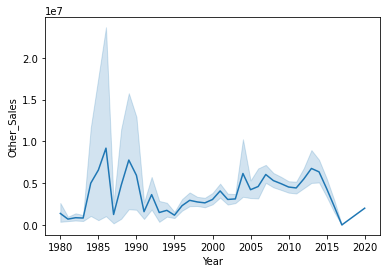

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.lineplot(data=may_flights, x="year", y="passengers")
sns.lineplot(data=df, x='Year',y='Other_Sales')
plt.show()

In [57]:
# 지역에 따라서 선호하는 게임 장르가 다를까?
# df를 지역별로 나눠 -> 장르별 총 판매량을 구해 -> 연도는 지워?
# 일단해봐 
#df.head()

grouped_Genre = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(df['Genre']).sum().reset_index()
grouped_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,76377030000,46653220000,14653170000,16841910000
1,Adventure,9459270000,5821140000,4965060000,1527080000
2,Fighting,20361810000,8943390000,7634180000,3358140000
3,Misc,36283760000,18002140000,9369230000,6765130000
4,Platform,41222310000,18396290000,10449210000,4472340000
5,Puzzle,9325070000,4790050000,4706000000,1199000000
6,Racing,32793490000,21576630000,5300260000,7239340000
7,Role-Playing,29515210000,16641030000,30862830000,5150730000
8,Shooter,52946650000,27848340000,3328040000,9639340000
9,Simulation,16409870000,9381100000,5933250000,2918070000


In [62]:
#NA_Sales 장르별 총 판매량

plt.figure(figsize=(15,5))
genre_NA = grouped_Genre.loc[:,['Genre','NA_Sales']]
#sns.barplot(data=genre_NA,x=genre_NA.index,y='NA_Sales')
#plt.show()




genre_NA

,Genre,NA_Sales
0,Action,76377030000
1,Adventure,9459270000
2,Fighting,20361810000
3,Misc,36283760000
4,Platform,41222310000
5,Puzzle,9325070000
6,Racing,32793490000
7,Role-Playing,29515210000
8,Shooter,52946650000
9,Simulation,16409870000


<Figure size 1080x360 with 0 Axes>

In [29]:
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(df['Genre']).sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,76377030000,46653220000,14653170000,16841910000
Adventure,9459270000,5821140000,4965060000,1527080000
Fighting,20361810000,8943390000,7634180000,3358140000
Misc,36283760000,18002140000,9369230000,6765130000
Platform,41222310000,18396290000,10449210000,4472340000
Puzzle,9325070000,4790050000,4706000000,1199000000
Racing,32793490000,21576630000,5300260000,7239340000
Role-Playing,29515210000,16641030000,30862830000,5150730000
Shooter,52946650000,27848340000,3328040000,9639340000
